  Annual Salary Range  Frequency RelFreq, % CumRelFreq, %
0               70-90          9      16.98         16.98
1              90-110         22      41.51         58.49
2             110-130         11      20.75         79.25
3             130-150          4       7.55         86.79
4             150-170          3       5.66         92.45
5             170-190          1       1.89         94.34
6             190-210          1       1.89         96.23
7             250-270          1       1.89         98.11
8             330-350          1       1.89        100.00


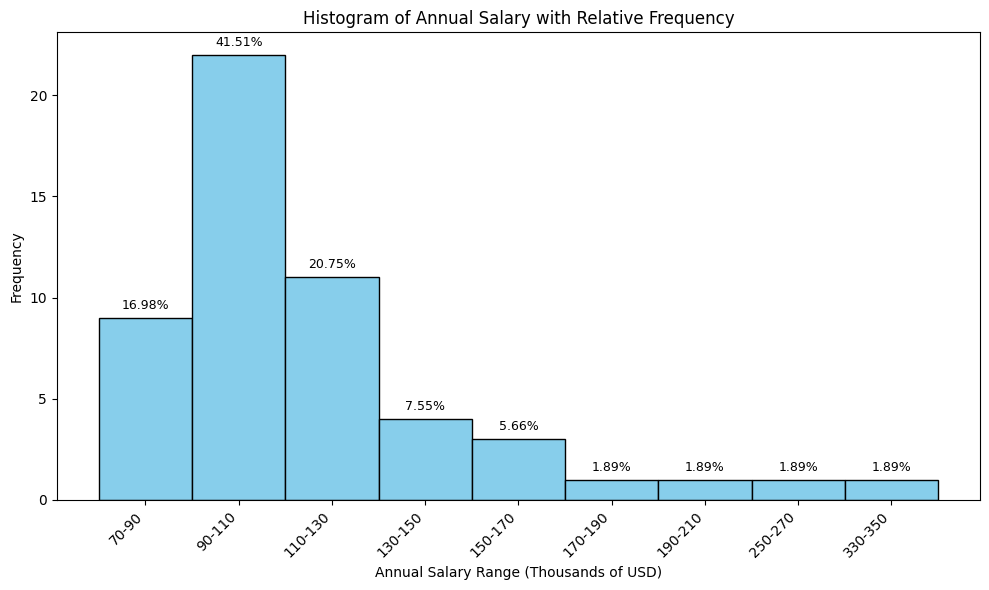

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'F:\Statistics for Data Analysis\Statistics+for+Data+Analysis_MY\SQL\Statistics for Data Analysis.xlsx'
sheet_name = 'Numerical Distributions'
column_name = 'Annual Salary (Thousands of USD)'
step = 20
start = 70

df = pd.read_excel(file_path, sheet_name=sheet_name)
salaries = df[column_name].dropna()

# BINNING
df['BinStart'] = ((salaries - start) // step) * step + start
df['BinStart'] = df['BinStart'].astype(int)

# FREQUENCY TABLE
table = (
    df.groupby('BinStart')
      .size()
      .reset_index(name='Frequency')
      .sort_values(by='BinStart')
      .reset_index(drop=True)
)

table['BinEnd'] = table['BinStart'] + step
table['Annual Salary Range'] = table['BinStart'].astype(str) + '-' + table['BinEnd'].astype(str)

# RELATIVE FREQUENCY
rel_freq = (table['Frequency'] / table['Frequency'].sum()) * 100
cum_rel_freq = rel_freq.cumsum()


table['RelFreq, %'] = rel_freq.map(lambda x: f"{x:.2f}")
table['CumRelFreq, %'] = cum_rel_freq.map(lambda x: f"{x:.2f}")

table = table[['Annual Salary Range', 'Frequency', 'RelFreq, %', 'CumRelFreq, %']]

# DISPLAY TABLE
print(table)

# --- PLOT HISTOGRAM ---
rel_freq_display = rel_freq.round(2)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    table['Annual Salary Range'],
    table['Frequency'],
    color='skyblue',
    edgecolor='black',
    width=1.0
)

# Add labels
for bar, rf in zip(bars, rel_freq_display):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f"{rf:.2f}%", 
            ha='center', va='bottom', fontsize=9)

# Axis and title
ax.set_xlabel("Annual Salary Range (Thousands of USD)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Annual Salary with Relative Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
